In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('household_power_consumption.txt',sep=';',parse_dates={'date_time' : ['Date', 'Time']}, infer_datetime_format=True,na_values=['nan','?'])


In [2]:
df.head

<bound method NDFrame.head of                   date_time  Global_active_power  Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                  0.418   
1       2006-12-16 17:25:00                5.360                  0.436   
2       2006-12-16 17:26:00                5.374                  0.498   
3       2006-12-16 17:27:00                5.388                  0.502   
4       2006-12-16 17:28:00                3.666                  0.528   
...                     ...                  ...                    ...   
2075254 2010-11-26 20:58:00                0.946                  0.000   
2075255 2010-11-26 20:59:00                0.944                  0.000   
2075256 2010-11-26 21:00:00                0.938                  0.000   
2075257 2010-11-26 21:01:00                0.934                  0.000   
2075258 2010-11-26 21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \

In [3]:
df.set_index('date_time', inplace=True)

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
#Filling missing data by imputation - Forward fill
data = df.fillna(method='ffill')
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

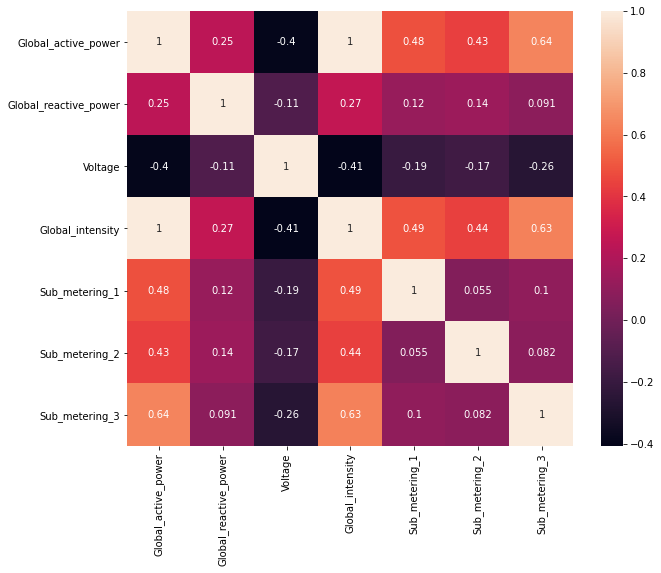

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True)

plt.show()


In [8]:
data.drop(columns='Global_intensity')

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0
...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,0.0,0.0,0.0


Text(0, 0.5, 'Global_active_power')

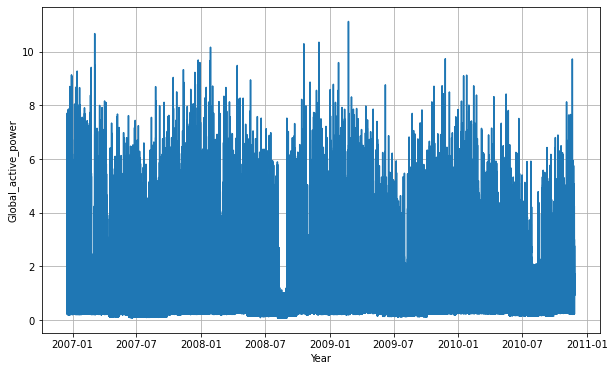

In [9]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data.Global_active_power )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')

Text(0, 0.5, 'Global_reactive_power')

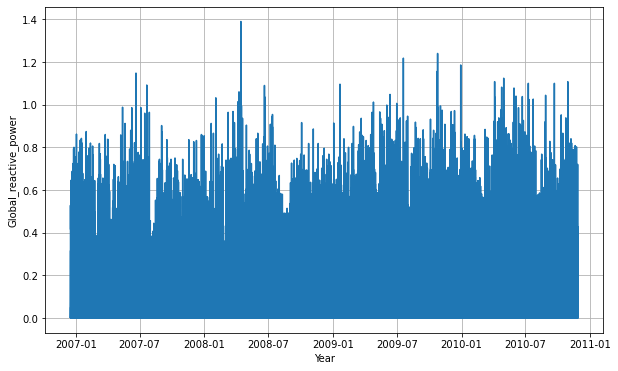

In [10]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data.Global_reactive_power )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_reactive_power')

Text(0, 0.5, 'Voltage')

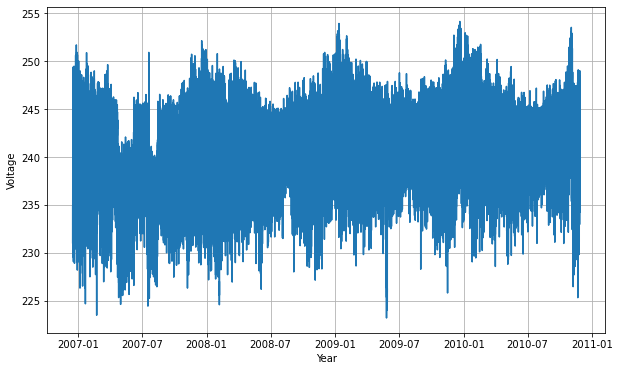

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data.index, data.Voltage )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Voltage')

In [12]:
df_daily = data.resample('D').mean()
df_daily

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889


In [13]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15,8


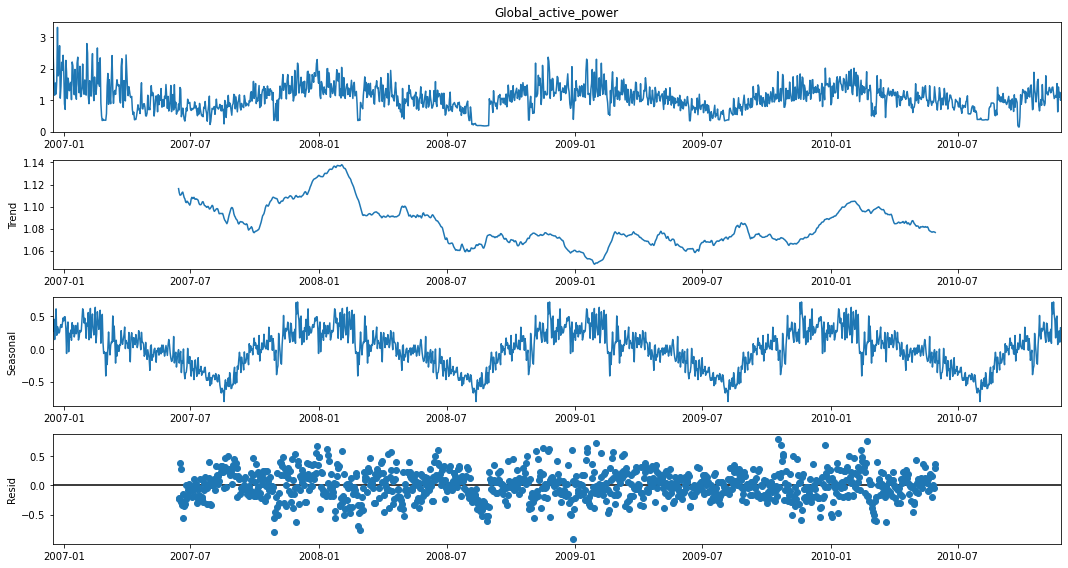

In [14]:
decompose_series = sm.tsa.seasonal_decompose(df_daily['Global_active_power'], model='additive', period = 30*12 )
decompose_series.plot()
plt.show()

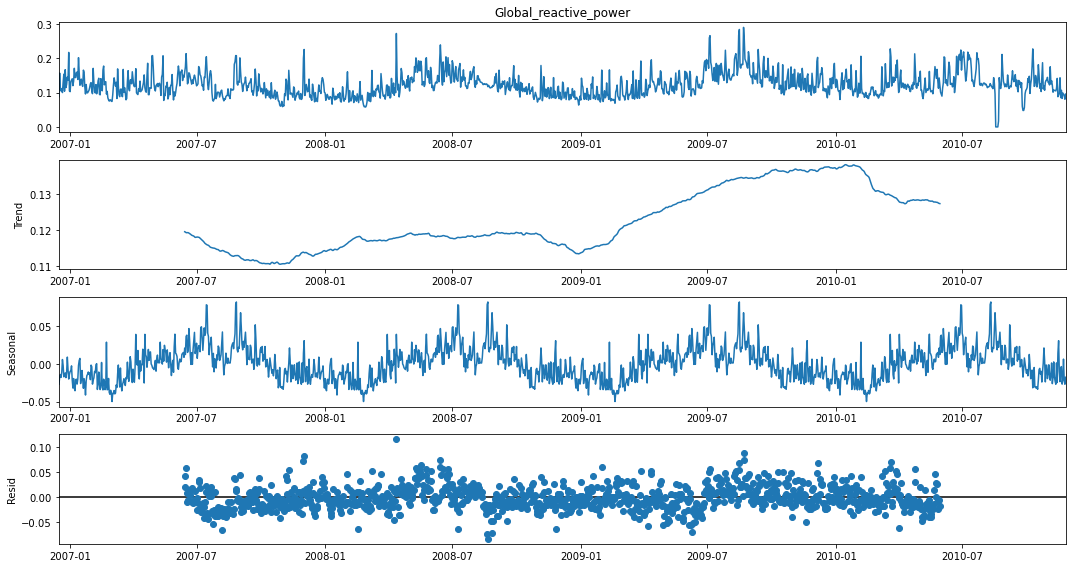

In [15]:
decompose_series = sm.tsa.seasonal_decompose(df_daily['Global_reactive_power'], model='additive', period = 30*12 )
decompose_series.plot()
plt.show()

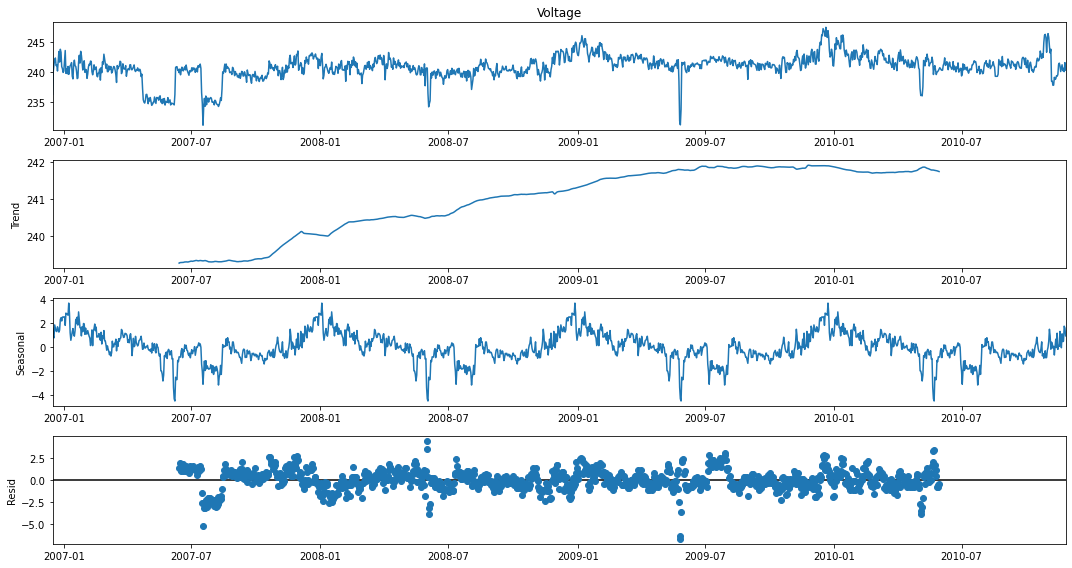

In [16]:
decompose_series = sm.tsa.seasonal_decompose(df_daily['Voltage'], model='additive', period =30*12 )
decompose_series.plot()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for a, b in adf_result[4].items():
    print(f'   {a}: {b}') 

ADF Statistic: -3.7347586808460123
p-value: 0.0036499731073697814
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


ValueError: x and y must have same first dimension, but have shapes (1442,) and (2075259,)

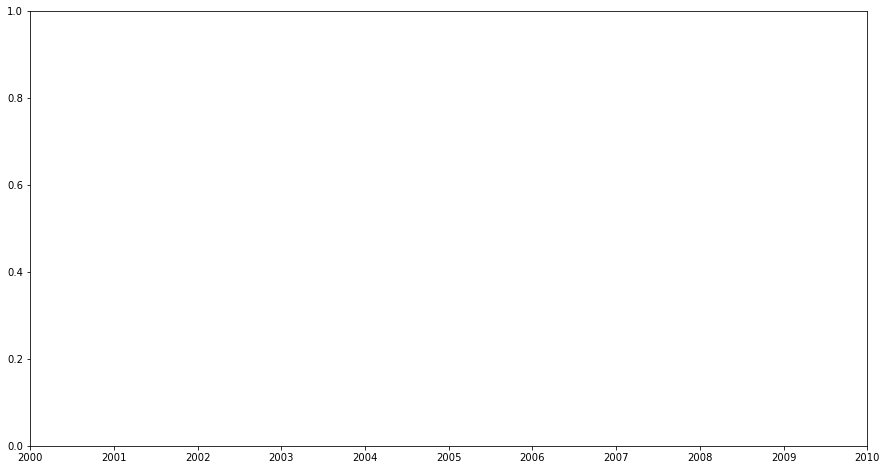

In [19]:

# plt.plot(df_daily.index, df['Global_active_power'], '-').agg('mean')
# plt.plot(df_diff.rolling(12).mean(), color='red')

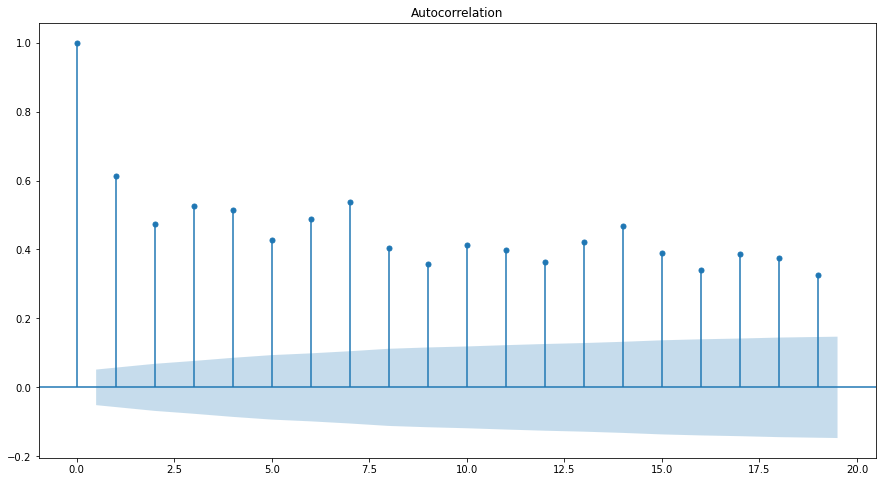

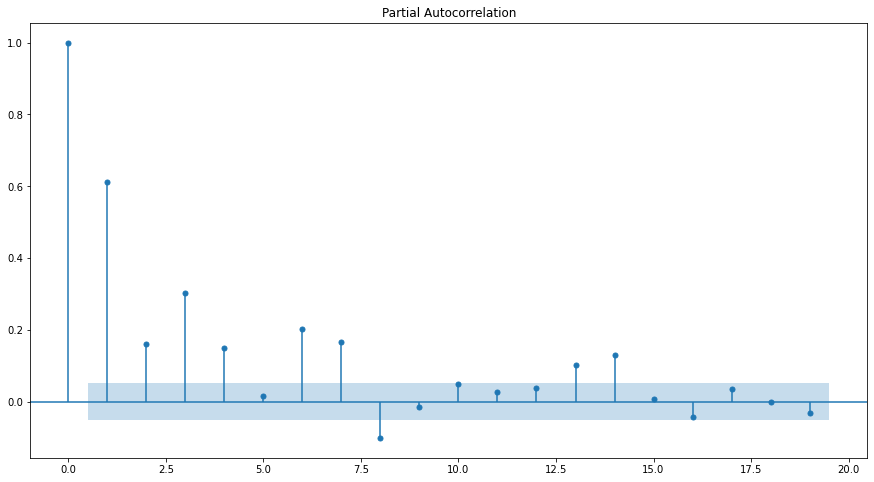

In [20]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF
plot_acf(df_daily['Global_active_power'], lags = range(0, 20))
plt.show()
#PACF
plot_pacf(df_daily['Global_active_power'], lags = range(0, 20))
plt.show()

In [ ]:
X= pd.DataFrame(data.Global_active_power)
train_size = int(0.8*(len(X)))
train, test = X[:train_size], X[train_size:len(X)]


#AR, MA and ARIMA
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
AR_model = ARIMA(data['Global_active_power'], order=(3,0,0))
AR_model_results = AR_model.fit(train)
predictions_AR=AR_model_results.forecast(test)
plt.plot(AR_model_results.fittedvalues, color='yellow')

MA_model = ARIMA(data['Global_active_power'], order=(0,0,2))
MA_model_results = MA_model.fit(train)
predictions_MA=M.A_model_results.forecast(test)
plt.plot(MA_model_results.fittedvalues, color='black')

ARIMA_model = ARIMA(data['Global_active_power'], order=(3,0,2))
ARIMA_results = ARIMA_model.fit(train)
predictions_ARIMA=ARIMA_result.forecast(test)

plt.plot(ARIMA_results.fittedvalues, color='red')
plt.plot(df_diff.loc['2006-12-16':'2007-12-16','Global_active_power'],color='blue')

In [ ]:
from sklearn.metrics import mean_squared_error
mse_ARIMA= mean_squared_error(test,predictions_ARIMA)
rmse_ARIMA= np.sqrt(mse_ARIMA)
rmse_ARIMA


In [ ]:
pd.date_range (start = '2006-12-16', end='2007-12-16', freq= 'D')

In [ ]:
train


In [ ]:
X.shape

In [ ]:
AR_model_results

In [ ]:
train

In [ ]:
X